<a href="https://colab.research.google.com/github/MajdQ93/Fraud/blob/main/Fraud_Detection_Case_StudyV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection Case Study:

In [ ]:
#import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from time import process_time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

print('Finsihed loading libraries')

Finsihed loading libraries


In [ ]:
# To handle warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#read the input file
fileName = 'fraud.csv'
print('File exists:', os.path.exists(fileName) )
Full_fraud = pd.read_csv(fileName)
print('Data shape is:', Full_fraud.shape)

File exists: True
Data shape is: (594643, 10)


In [ ]:
# Define the fraction of data you want to sample (e.g., 10%)
sample_fraction = 1  # Adjust this as needed # 1 means all dataset 100%

# Randomly sample a fraction of your data
fraud_data = Full_fraud.sample(frac=sample_fraction, random_state=42)
print(fraud_data.shape)

(594643, 10)


In [ ]:
print(fraud_data.head())

        step       customer  age gender zipcodeOri       merchant zipMerchant  \
70803     26   'C746862122'  '3'    'M'    '28007'   'M348934600'     '28007'   
470791   146  'C1760492708'  '1'    'F'    '28007'  'M1823072687'     '28007'   
568310   172  'C1984083185'  '3'    'F'    '28007'  'M1823072687'     '28007'   
23709      9  'C1530262146'  '2'    'M'    '28007'  'M1823072687'     '28007'   
49723     19  'C1471216995'  '3'    'F'    '28007'   'M348934600'     '28007'   

                   category  amount  fraud  
70803   'es_transportation'   11.65      0  
470791  'es_transportation'    1.60      0  
568310  'es_transportation'   33.36      0  
23709   'es_transportation'    8.01      0  
49723   'es_transportation'   38.11      0  


In [ ]:
#check the data info
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594643 entries, 70803 to 121958
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 49.9+ MB


In [ ]:
#check the summary stats
fraud_data.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


# Exploratory Data Analysis (EDA):

In [ ]:
#basic summary statistics for numerical columns:
summary_stats = fraud_data.describe()
print(summary_stats)


                step         amount          fraud
count  594643.000000  594643.000000  594643.000000
mean       94.986827      37.890135       0.012108
std        51.053632     111.402831       0.109369
min         0.000000       0.000000       0.000000
25%        52.000000      13.740000       0.000000
50%        97.000000      26.900000       0.000000
75%       139.000000      42.540000       0.000000
max       179.000000    8329.960000       1.000000


In [ ]:
#distribution of the target variable ('fraud') to understand class imbalanceS
Target_distribution = fraud_data['fraud'].value_counts()
print(Target_distribution)

0    587443
1      7200
Name: fraud, dtype: int64


<Axes: xlabel='fraud', ylabel='count'>

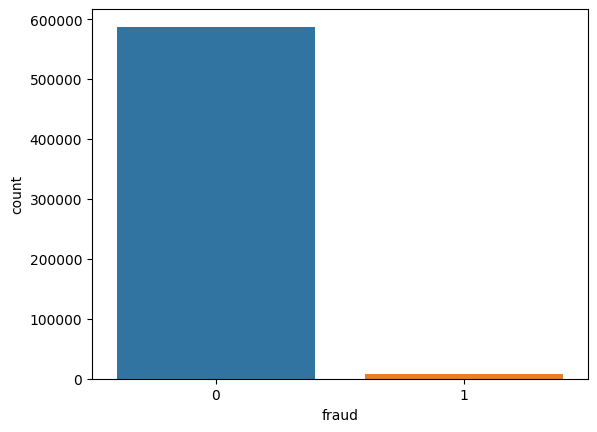

In [ ]:
#Visualize frequency distribution of Class variable:
sns.countplot( data=fraud_data,x="fraud")

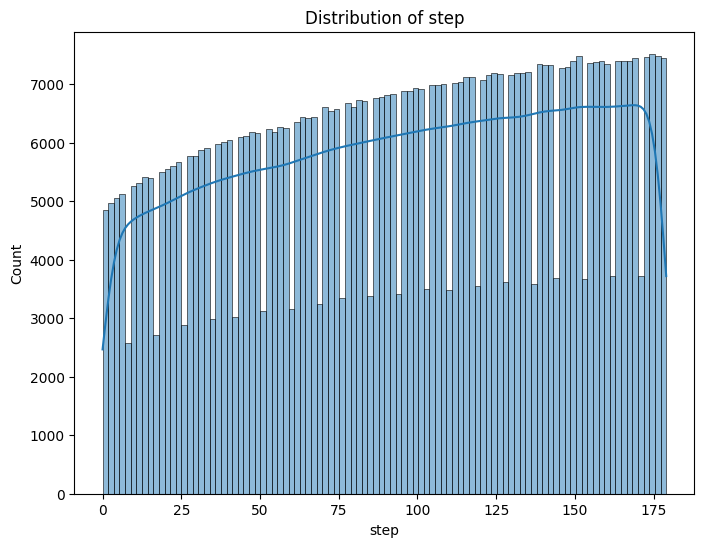

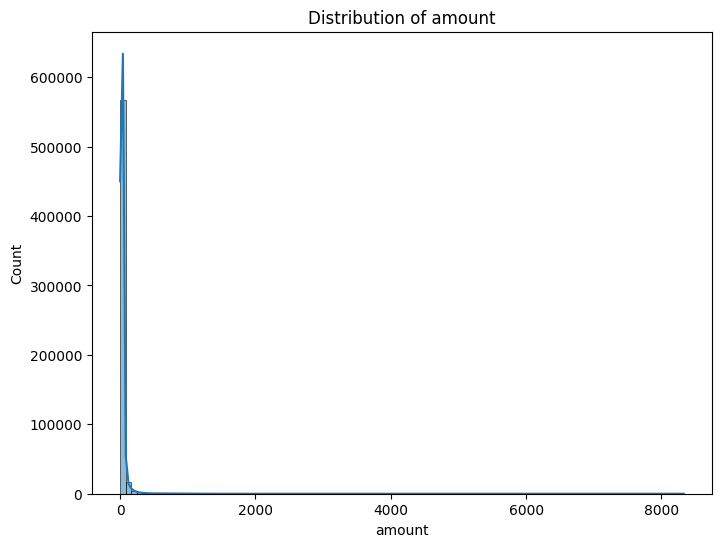

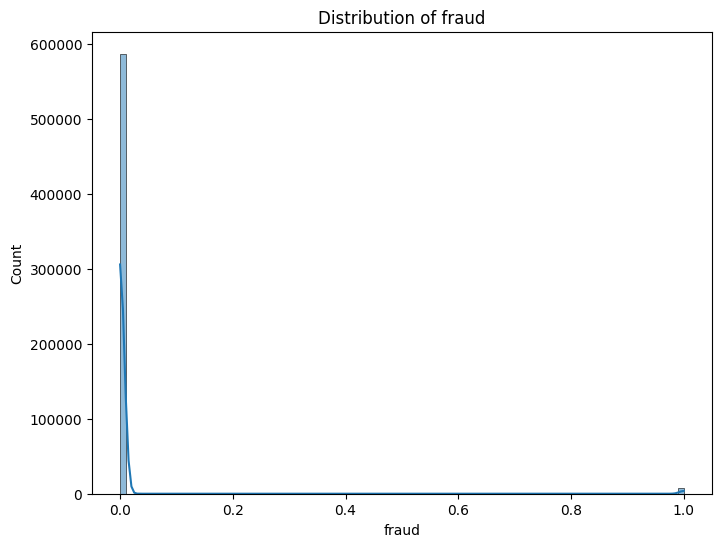

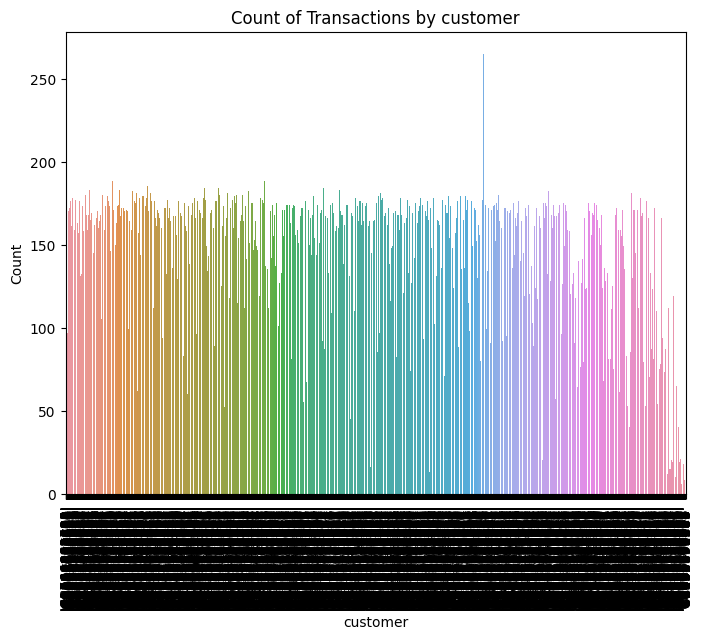

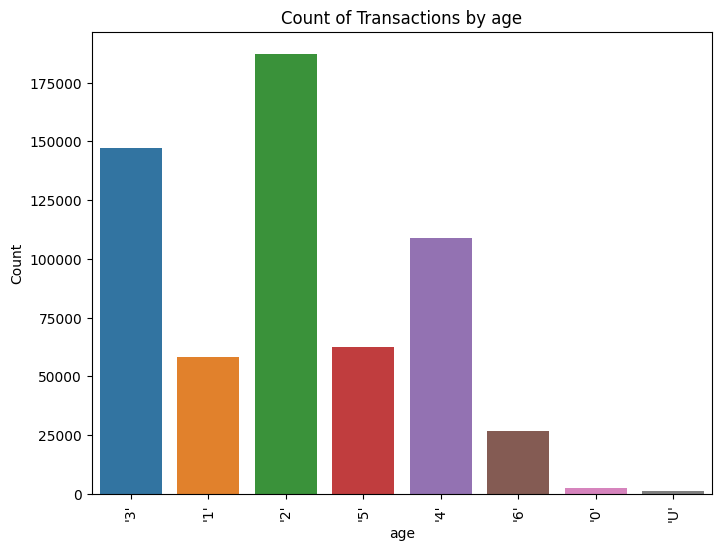

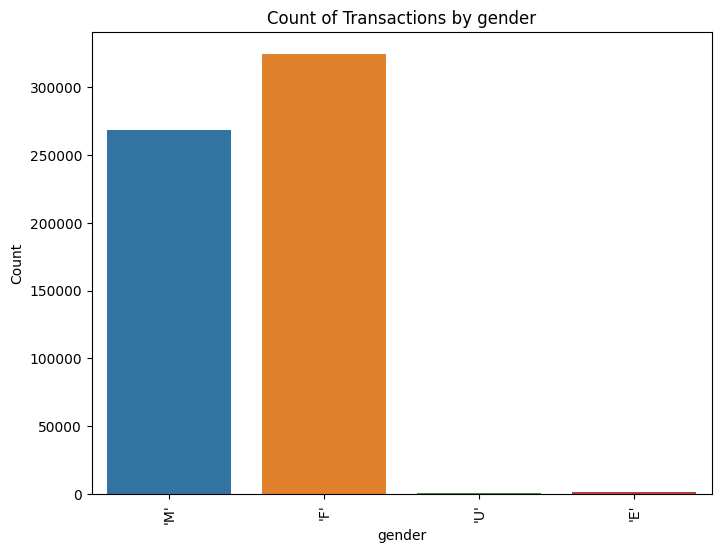

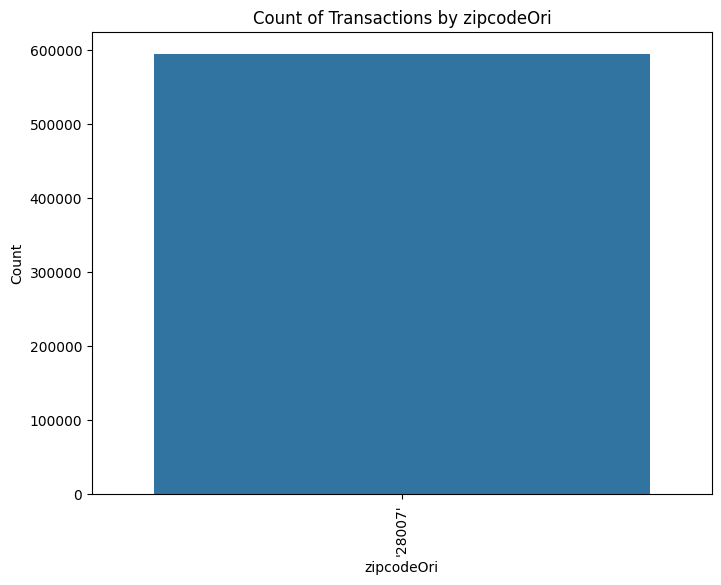

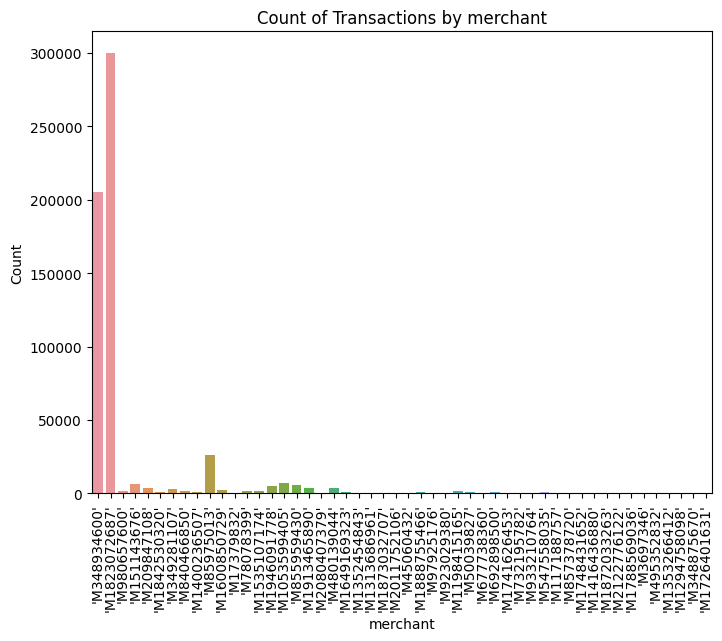

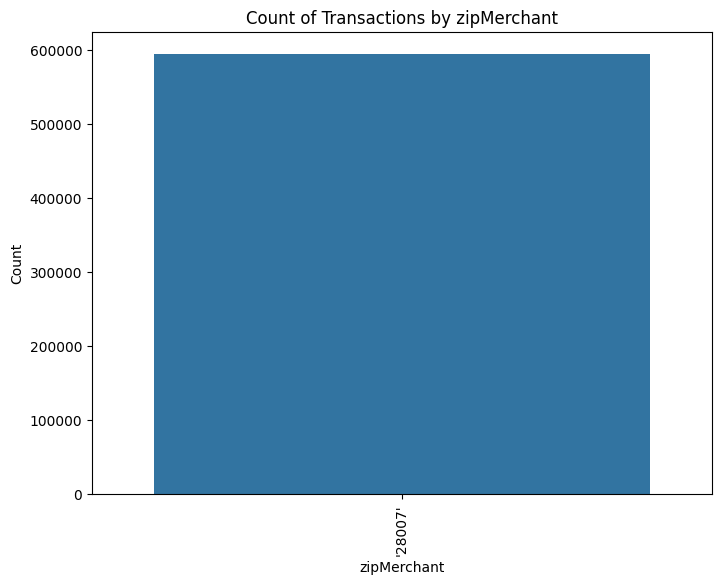

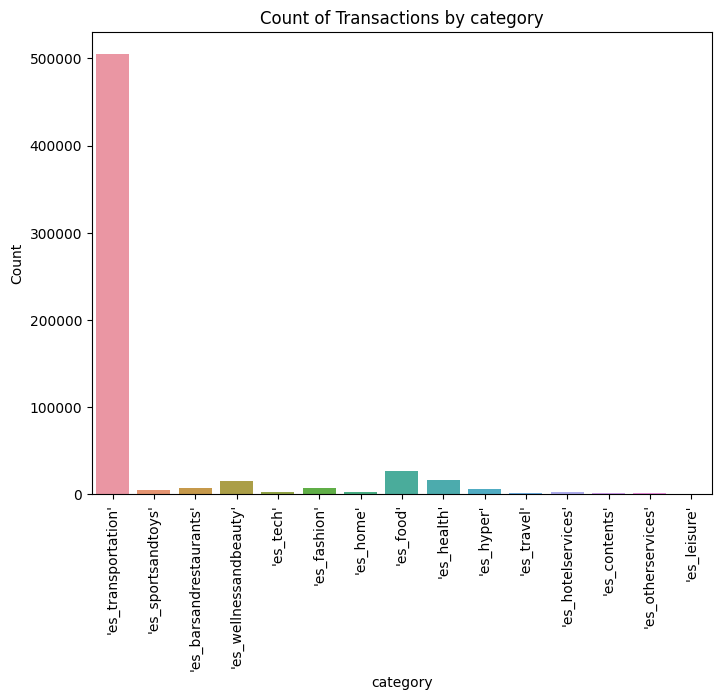

In [ ]:
#Univariate Analysis
#Explore each feature individually through histograms for numerical columns and bar plots for categorical columns for all feature
# Separate numerical and categorical columns
numerical_columns = fraud_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = fraud_data.select_dtypes(include=['object']).columns

# Plot histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(fraud_data[col], bins=100, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Plot bar plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=fraud_data, x=col)
    plt.title(f'Count of Transactions by {col}')
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

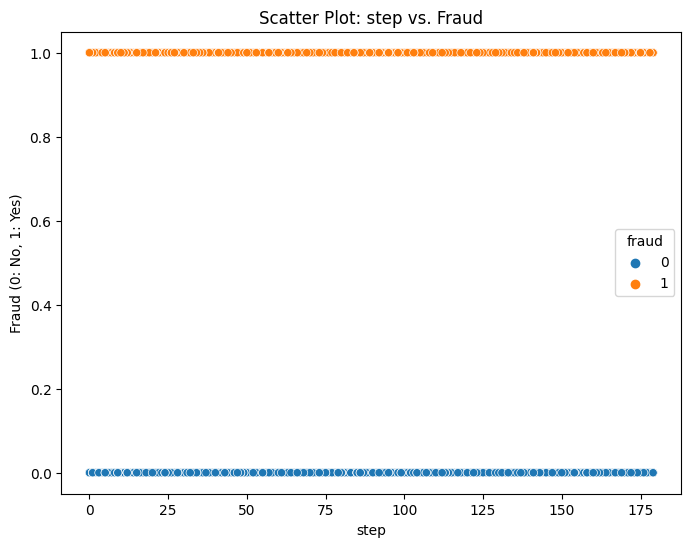

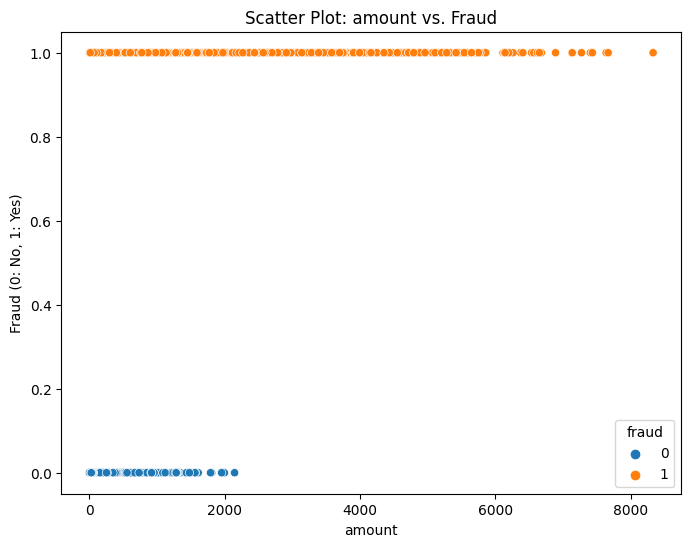

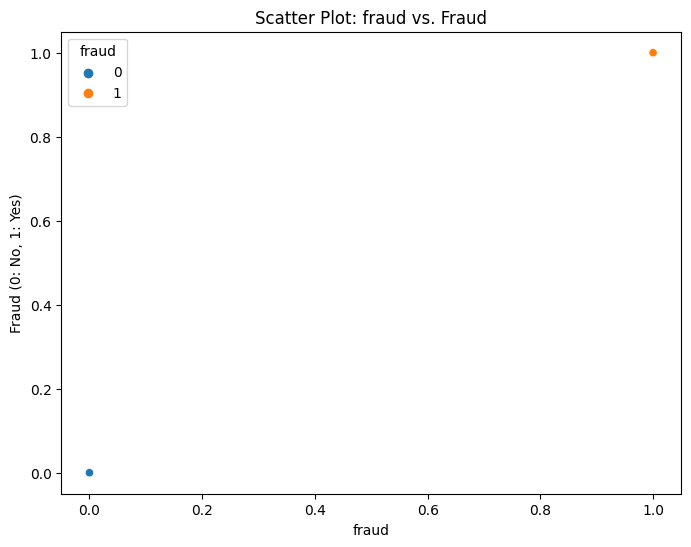

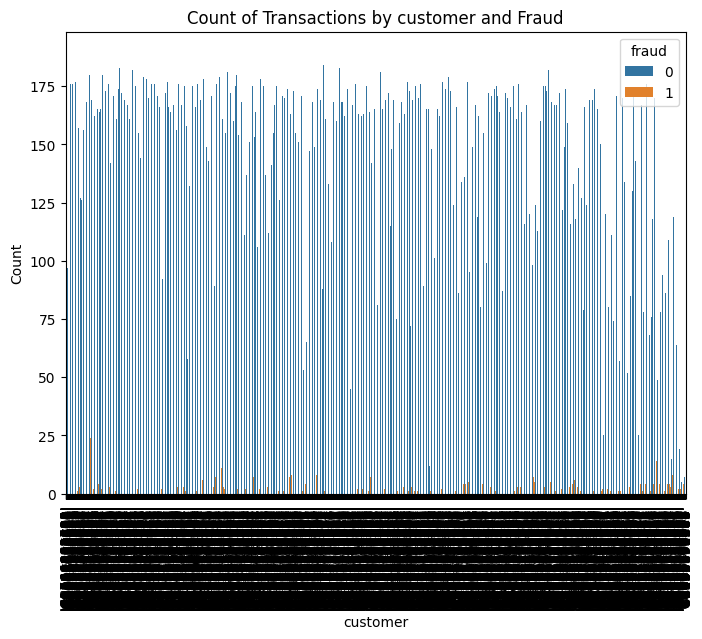

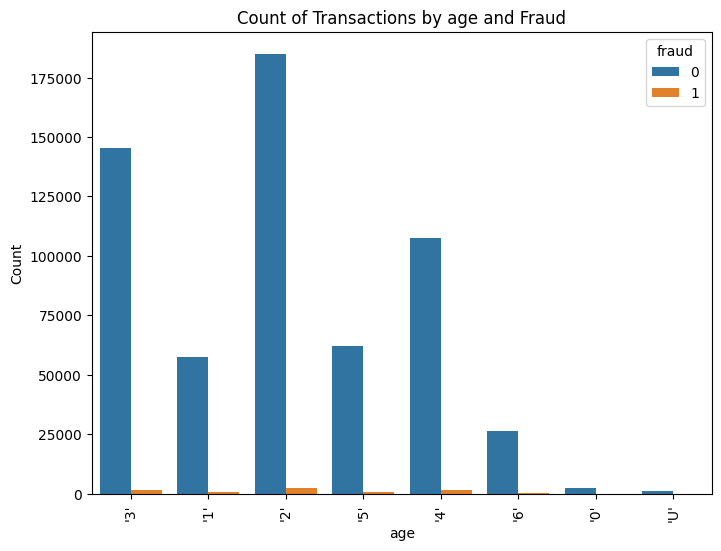

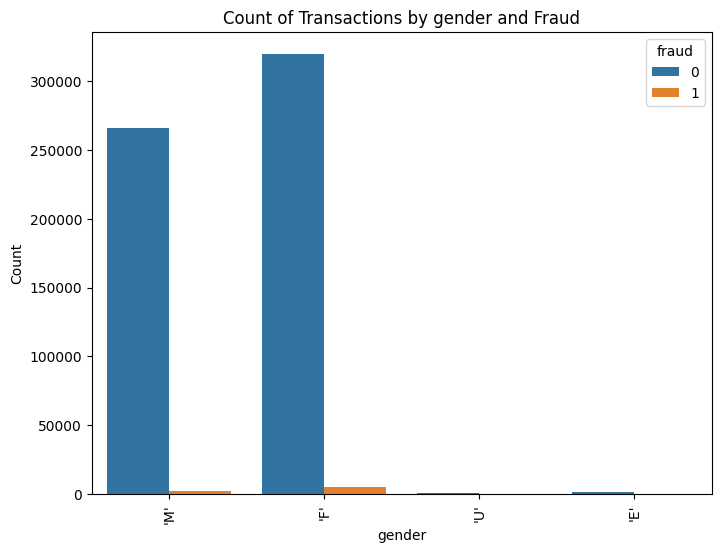

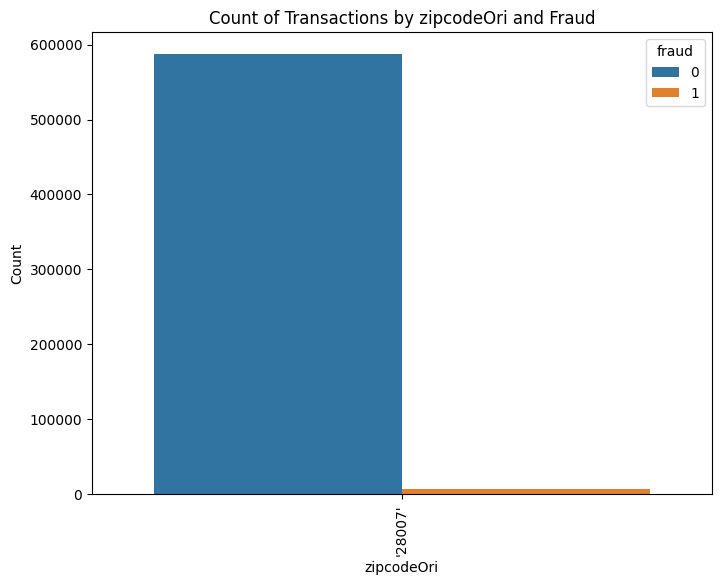

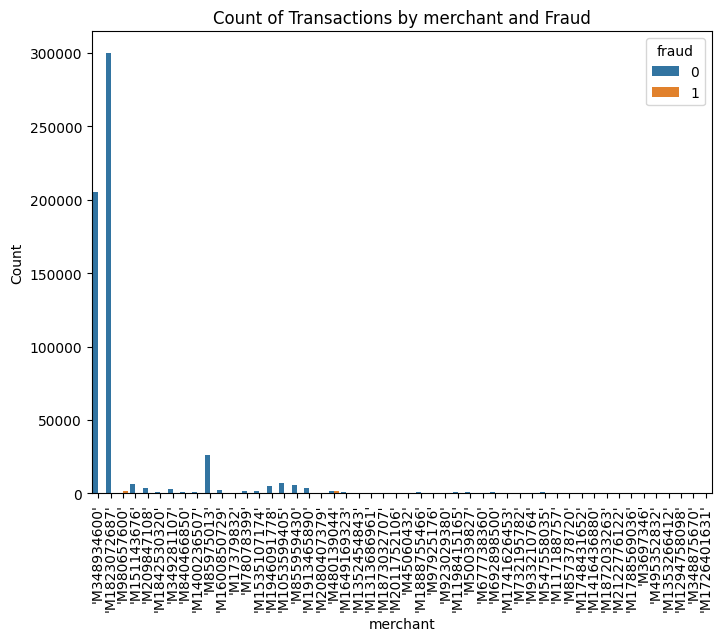

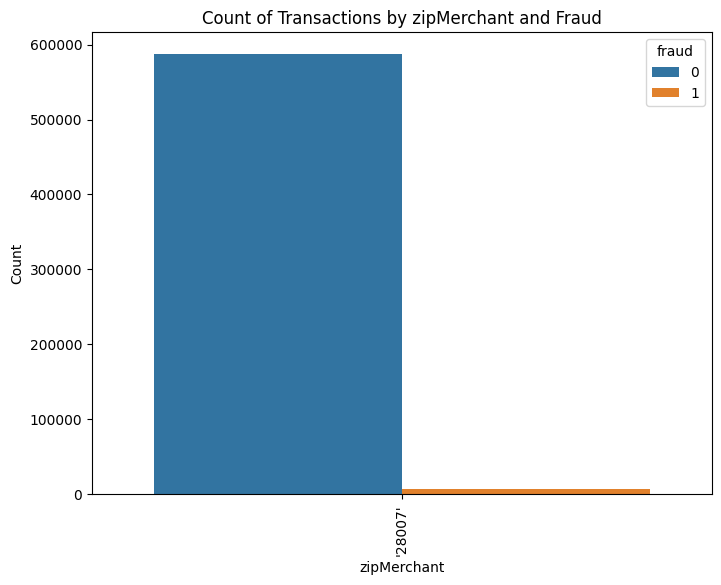

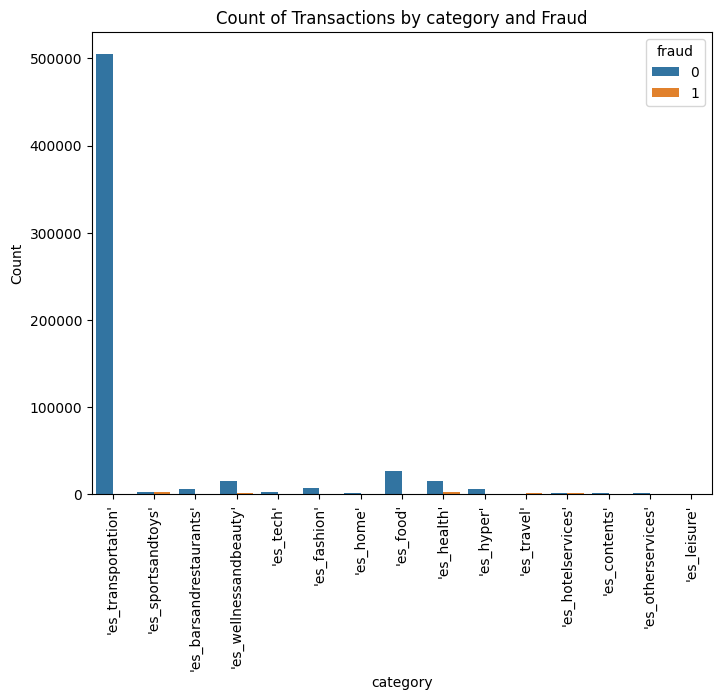

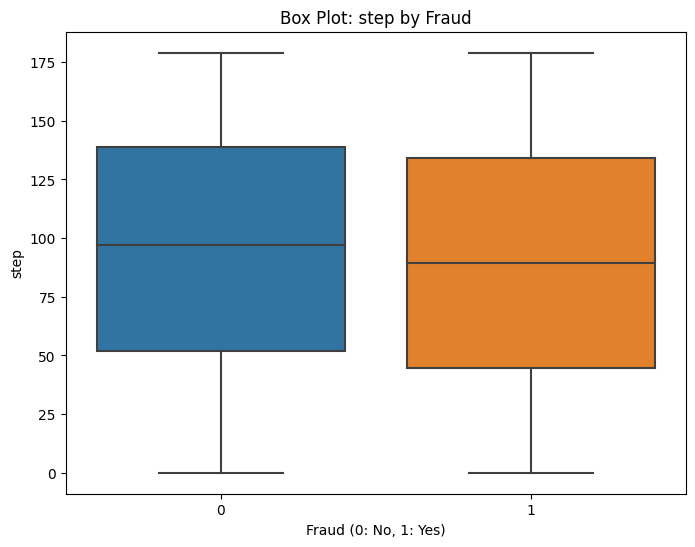

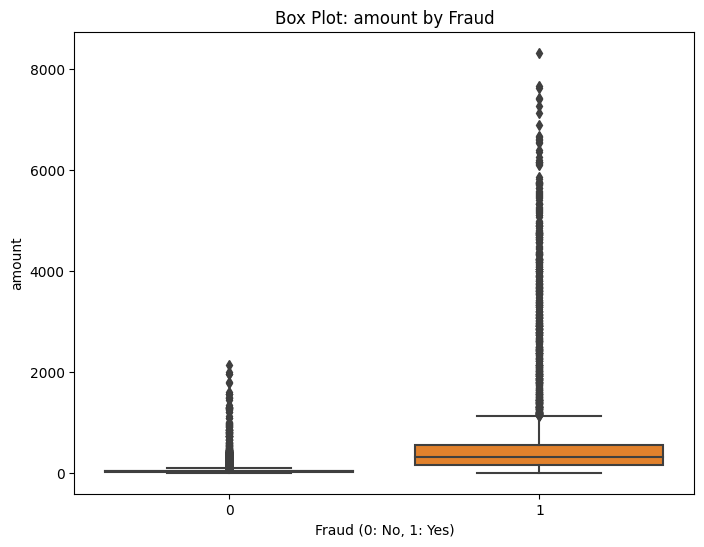

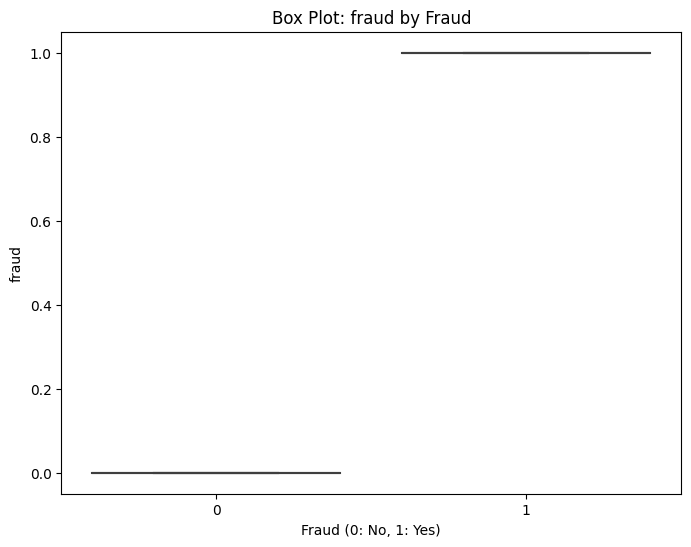

In [ ]:
#Bivariate Analysis:
#Explore relationships between features and the target variable ('fraud') using scatter plots, box plots, or bar plots:

# Explore relationships between numerical features and 'fraud' using scatter plots
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=fraud_data, x=col, y='fraud', hue='fraud')
    plt.title(f'Scatter Plot: {col} vs. Fraud')
    plt.xlabel(col)
    plt.ylabel('Fraud (0: No, 1: Yes)')
    plt.show()

# Explore relationships between categorical features and 'fraud' using bar plots
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=fraud_data, x=col, hue='fraud')
    plt.title(f'Count of Transactions by {col} and Fraud')
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Explore relationships between numerical features and 'fraud' using box plots
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=fraud_data, x='fraud', y=col)
    plt.title(f'Box Plot: {col} by Fraud')
    plt.xlabel('Fraud (0: No, 1: Yes)')
    plt.ylabel(col)
    plt.show()





<ipython-input-12-6c4701a2b201>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = fraud_data.corr()


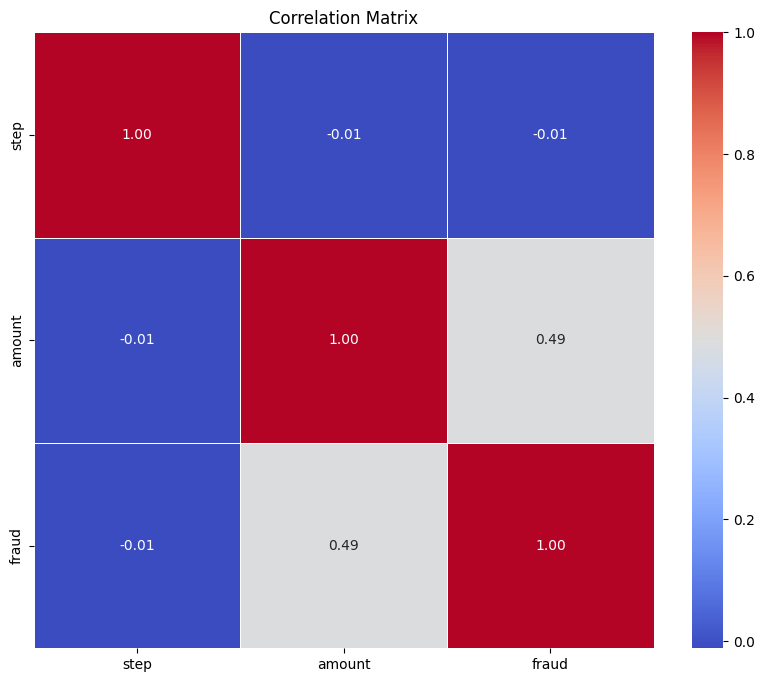

In [ ]:
#Correlation Analysis:
#Calculate and visualize the correlation matrix to understand relationships between numerical features:
correlation_matrix = fraud_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

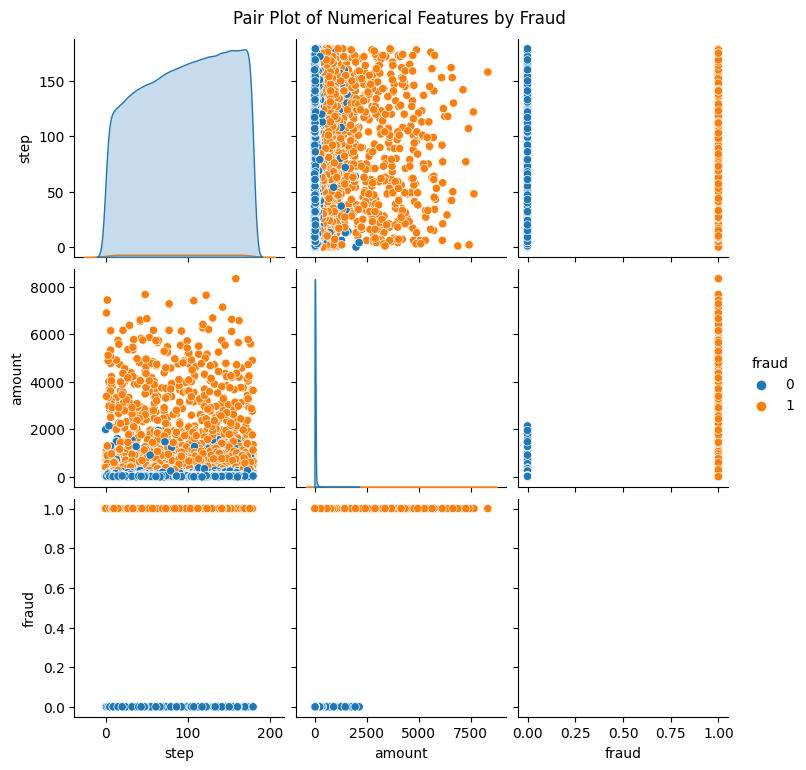

In [ ]:
# Create a pair plot
pair_plot = sns.pairplot(fraud_data, vars=numerical_columns, hue='fraud', diag_kind='kde')
# Adjust the location of the title
pair_plot.fig.suptitle('Pair Plot of Numerical Features by Fraud', y=1.02)

plt.show()

# Data Preprocessing:

##Missing Values:

In [ ]:
# Check for missing values
print(fraud_data.isnull().sum())

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64


In [ ]:
#check which columns have NA values
fraud_data.isna().any()

step           False
customer       False
age            False
gender         False
zipcodeOri     False
merchant       False
zipMerchant    False
category       False
amount         False
fraud          False
dtype: bool

##categorical data:

In [ ]:
#find categorical data:
categorical_columns = fraud_data.select_dtypes(include=['object']).copy()
categorical_columns.head()

,customer,age,gender,zipcodeOri,merchant,zipMerchant,category
70803,'C746862122','3','M','28007','M348934600','28007','es_transportation'
470791,'C1760492708','1','F','28007','M1823072687','28007','es_transportation'
568310,'C1984083185','3','F','28007','M1823072687','28007','es_transportation'
23709,'C1530262146','2','M','28007','M1823072687','28007','es_transportation'
49723,'C1471216995','3','F','28007','M348934600','28007','es_transportation'


## Remove single quotes from categorical columns

In [ ]:
# Remove single quotes from categorical columns
for col in categorical_columns:
   fraud_data[col] = fraud_data[col].str.strip("'")

print('Done')

Done


In [ ]:
#find categorical data after removing single quotes:
print (fraud_data.select_dtypes(include=['object']).copy().head())

           customer age gender zipcodeOri     merchant zipMerchant  \
70803    C746862122   3      M      28007   M348934600       28007   
470791  C1760492708   1      F      28007  M1823072687       28007   
568310  C1984083185   3      F      28007  M1823072687       28007   
23709   C1530262146   2      M      28007  M1823072687       28007   
49723   C1471216995   3      F      28007   M348934600       28007   

                 category  
70803   es_transportation  
470791  es_transportation  
568310  es_transportation  
23709   es_transportation  
49723   es_transportation  


In [ ]:
# find unique values :
fraud_data.nunique()

step             180
customer        4112
age                8
gender             4
zipcodeOri         1
merchant          50
zipMerchant        1
category          15
amount         23767
fraud              2
dtype: int64

## Remove columns provide no useful information for modeling or analysis

In [ ]:
#Remove columns provide no useful information for modeling or analysis:
removed_list=['customer','zipcodeOri','zipMerchant']
fraud_data = fraud_data.drop(removed_list, axis=1)
print('Done')

Done


In [ ]:
fraud_data = fraud_data[fraud_data['gender'] != 'U']
print(fraud_data.shape)

(594128, 7)


In [ ]:
print(fraud_data.shape)

(594128, 7)


In [ ]:
#find categorical data
print ( fraud_data.select_dtypes(include=['object']).copy().head())


       age gender     merchant           category
70803    3      M   M348934600  es_transportation
470791   1      F  M1823072687  es_transportation
568310   3      F  M1823072687  es_transportation
23709    2      M  M1823072687  es_transportation
49723    3      F   M348934600  es_transportation


## one-hot encoding for categorical columns

In [ ]:
# Perform one-hot encoding for all categorical columns
categorical_columns = [ 'age', 'gender', 'category','merchant']
data = pd.get_dummies(fraud_data, columns=categorical_columns, drop_first=True)
print('Done')

Done


In [ ]:
print(data.shape)

(594128, 75)


In [ ]:
data.head()

,step,amount,fraud,age_1,age_2,age_3,age_4,age_5,age_6,age_U,...,merchant_M732195782,merchant_M78078399,merchant_M840466850,merchant_M855959430,merchant_M857378720,merchant_M85975013,merchant_M923029380,merchant_M933210764,merchant_M97925176,merchant_M980657600
70803,26,11.65,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
470791,146,1.60,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
568310,172,33.36,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23709,9,8.01,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49723,19,38.11,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the dataset

In [ ]:
# Split the dataset into features (X) and the target variable (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Display the first few rows of the features and target variable
print("Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Features (X):
        step  amount  age_1  age_2  age_3  age_4  age_5  age_6  age_U  \
70803     26   11.65      0      0      1      0      0      0      0   
470791   146    1.60      1      0      0      0      0      0      0   
568310   172   33.36      0      0      1      0      0      0      0   
23709      9    8.01      0      1      0      0      0      0      0   
49723     19   38.11      0      0      1      0      0      0      0   

        gender_F  ...  merchant_M732195782  merchant_M78078399  \
70803          0  ...                    0                   0   
470791         1  ...                    0                   0   
568310         1  ...                    0                   0   
23709          0  ...                    0                   0   
49723          1  ...                    0                   0   

        merchant_M840466850  merchant_M855959430  merchant_M857378720  \
70803                     0                    0                    0   
4707

In [ ]:
#basic summary statistics for numerical columns:
summary_stats = data.describe()
print(summary_stats)

                step         amount          fraud          age_1  \
count  594128.000000  594128.000000  594128.000000  594128.000000   
mean       94.991147      37.895667       0.012119       0.097543   
std        51.053159     111.446992       0.109416       0.296696   
min         0.000000       0.000000       0.000000       0.000000   
25%        52.000000      13.740000       0.000000       0.000000   
50%        97.000000      26.900000       0.000000       0.000000   
75%       139.000000      42.540000       0.000000       0.000000   
max       179.000000    8329.960000       1.000000       1.000000   

               age_2          age_3          age_4          age_5  \
count  594128.000000  594128.000000  594128.000000  594128.000000   
mean        0.314993       0.247351       0.183504       0.105435   
std         0.464513       0.431473       0.387080       0.307114   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

# Feature Engineering:

In [ ]:
# Create new relevant features
# Let's derive the time of day from the 'step' column (assuming 1 step = 1 hour)
data['TimeOfDay'] = data['step'] % 24  # The modulo operation to get the hour of the day

# Display the first few rows of the updated dataset with the new feature
print("Updated Feature (TimeOfDay ):")
print(data.head())

Updated Feature (TimeOfDay ):
        step  amount  fraud  age_1  age_2  age_3  age_4  age_5  age_6  age_U  \
70803     26   11.65      0      0      0      1      0      0      0      0   
470791   146    1.60      0      1      0      0      0      0      0      0   
568310   172   33.36      0      0      0      1      0      0      0      0   
23709      9    8.01      0      0      1      0      0      0      0      0   
49723     19   38.11      0      0      0      1      0      0      0      0   

        ...  merchant_M78078399  merchant_M840466850  merchant_M855959430  \
70803   ...                   0                    0                    0   
470791  ...                   0                    0                    0   
568310  ...                   0                    0                    0   
23709   ...                   0                    0                    0   
49723   ...                   0                    0                    0   

        merchant_M85737872

In [ ]:
print(data.shape)

(594128, 76)


## scaling

In [ ]:
#scaling features
scaler = MinMaxScaler()
scaler.fit(data)
print('Done')

Done


In [ ]:
# Split the dataset into features (X) and the target variable (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Display the first few rows of the features and target variable
print("Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Features (X):
        step  amount  age_1  age_2  age_3  age_4  age_5  age_6  age_U  \
70803     26   11.65      0      0      1      0      0      0      0   
470791   146    1.60      1      0      0      0      0      0      0   
568310   172   33.36      0      0      1      0      0      0      0   
23709      9    8.01      0      1      0      0      0      0      0   
49723     19   38.11      0      0      1      0      0      0      0   

        gender_F  ...  merchant_M78078399  merchant_M840466850  \
70803          0  ...                   0                    0   
470791         1  ...                   0                    0   
568310         1  ...                   0                    0   
23709          0  ...                   0                    0   
49723          1  ...                   0                    0   

        merchant_M855959430  merchant_M857378720  merchant_M85975013  \
70803                     0                    0                   0   
470791

In [ ]:
print(X.shape)
print(y.shape)

(594128, 75)
(594128,)


# Model Selection:

## Split the original data into training and testing sets

In [ ]:
# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Done')

Done


Model fitting & Model Evaluation

In [ ]:

# Define a simple MLP neural network
nn = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#creating the objects
lr =LogisticRegression()
dt =DecisionTreeClassifier()
rf =RandomForestClassifier()
Xgb = XGBClassifier()
Gnb = GaussianNB()


models_dict = {0: 'Logistic Regression',
               1: 'Decision Tree',
               2: 'Random Forest',
               3:'XGBoost',
               4:'Gnb',}

models=[lr,dt,rf,Xgb,Gnb]

for i,model in enumerate(models):
    start = process_time()
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    end = process_time()
    t= end - start
    acc = round(acc, 5)
    t = round(t, 3)

    print(" {} Classifier test accuracy is {} with {} seconds as training time " .format(models_dict[i],acc,t))

# Define a simple MLP neural network
nn = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network
start = process_time()
nn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
end = process_time()
training_time = end - start

# Evaluate the neural network
test_loss, test_accuracy = nn.evaluate(X_test, y_test)

print("Neural Network (MLP) test accuracy is {:.5f} with {:.3f} seconds as training time.".format(test_accuracy, training_time))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Logistic Regression Classifier test accuracy is 0.99535 with 20.82 seconds as training time 
 Decision Tree Classifier test accuracy is 0.99409 with 10.137 seconds as training time 
 Random Forest Classifier test accuracy is 0.99581 with 50.066 seconds as training time 
 XGBoost Classifier test accuracy is 0.99625 with 235.044 seconds as training time 
 Gnb Classifier test accuracy is 0.93959 with 1.328 seconds as training time 
[LightGBM] [Info] Number of positive: 5154, number of negative: 410735
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 415889, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.012393 -> initscore=-4.378175
[LightGBM] [Info] Start training from score -4.378175
 clf 

## Comparison between RandomForestClassifier & XGBClassifier

In [ ]:
# Create instances of the classifiers
rf_classifier = RandomForestClassifier()
xgb_classifier = XGBClassifier()

# Define the evaluation metrics
scoring_metrics = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Perform cross-validation and calculate multiple scores
rf_scores = cross_validate(rf_classifier, X, y, cv=5, scoring=scoring_metrics)
xgb_scores = cross_validate(xgb_classifier, X, y, cv=5, scoring=scoring_metrics)

# Calculate the mean scores for each metric
rf_mean_scores = {metric: np.mean(scores) for metric, scores in rf_scores.items()}
xgb_mean_scores = {metric: np.mean(scores) for metric, scores in xgb_scores.items()}

# Print the mean scores for each metric
print("Random Forest Mean Scores:")
for metric, score in rf_mean_scores.items():
    print(f"{metric}: {score:.4f}")

print("\nXGBoost Mean Scores:")
for metric, score in xgb_mean_scores.items():
    print(f"{metric}: {score:.4f}")


Random Forest Mean Scores:
fit_time: 60.0155
score_time: 2.2382
test_precision: 0.8604
test_recall: 0.7674
test_f1_score: 0.8112

XGBoost Mean Scores:
fit_time: 153.8698
score_time: 0.4356
test_precision: 0.8889
test_recall: 0.7611
test_f1_score: 0.8200


Insights:The choice between Random Forest and XGBoost should consider a trade-off between model performance and computational efficiency. If slightly higher precision is more critical for your task and you can afford longer training times, XGBoost might be preferable. On the other hand, if you need a faster model that still provides competitive performance, Random Forest is a good choice(Trade-offs).

### Random Forest model fitting & Evaluation

In [ ]:
# Create a Random Forest model
random_forest_model = RandomForestClassifier()

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

Random Forest Accuracy: 0.9958033875863307
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    176193
           1       0.85      0.78      0.81      2046

    accuracy                           1.00    178239
   macro avg       0.92      0.89      0.90    178239
weighted avg       1.00      1.00      1.00    178239



# Handling Imbalance:

## ## Oversampling

In [ ]:
# Split the dataset into features (X) and the target variable (y)
X = data.drop('fraud', axis=1)
y = data['fraud']
print(X.shape)
print(y.shape)

(594128, 75)
(594128,)


In [ ]:
#over_sampling:

print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({0: 586928, 1: 7200})
Resampled dataset shape Counter({0: 586928, 1: 586928})


In [ ]:
# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
print('Done')

Done


In [ ]:
# Create a Random Forest model
random_forest_model = RandomForestClassifier()

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

Random Forest Accuracy: 0.9978901455884733
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    176193
           1       1.00      1.00      1.00    175964

    accuracy                           1.00    352157
   macro avg       1.00      1.00      1.00    352157
weighted avg       1.00      1.00      1.00    352157



## Undersampling

In [ ]:
# Split the dataset into features (X) and the target variable (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

In [ ]:
print(X.shape)
print(y.shape)

(594128, 75)
(594128,)


In [ ]:
#Undersampling:
random_undersampler = RandomUnderSampler(random_state=42)
X_res, y_res = random_undersampler.fit_resample(X, y)
print('Done')

Done


In [ ]:
# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
print('Done')

Done


##  Random Forest model after undersampling

In [ ]:
# Create a Random Forest model
random_forest_model = RandomForestClassifier()

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

Random Forest Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2138
           1       0.97      0.98      0.98      2182

    accuracy                           0.98      4320
   macro avg       0.98      0.98      0.98      4320
weighted avg       0.98      0.98      0.98      4320



## GridSearchCV

In [ ]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300 ,400 ,500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 5, 6]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', verbose=2)

# Fit the model with different hyperparameter combinations
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best F1-Score:", f1)


Fitting 5 folds for each of 625 candidates, totalling 3125 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_

In [ ]:
# Create a Random Forest classifier with the best hyperparameters
model = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200)

# Fit the model with your entire training dataset
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=200)

In [ ]:
# Assuming 'new_data' is your new dataset after preprocessing
predictions = model.predict(X_test)

# 'predictions' will contain 1 for fraudulent transactions and 0 for benign transactions

In [ ]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9761574074074074
Confusion Matrix:
 [[2072   66]
 [  37 2145]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2138
           1       0.97      0.98      0.98      2182

    accuracy                           0.98      4320
   macro avg       0.98      0.98      0.98      4320
weighted avg       0.98      0.98      0.98      4320



Insights: Removing unknown gender customers ('U' gender) improved the accuracy score from 0.97532 before removal to 0.97616 after removing them.